In [3]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import newton
import matplotlib.pyplot as plt

# Define the system of ODEs equivalent to the third-order ODE
def blasius_system(y, eta):
    f, fp, fpp = y  # Unpack the variables
    return [fp, fpp, -0.5*f*fpp]

# Function to apply the shooting method
def shoot(fpp0):
    # Integrate the system of ODEs with the current guess for fpp0
    sol = odeint(blasius_system, [f0, fp0, fpp0], eta)
    
    # The function we want to find the root for.
    # We want the solution at eta_max to be equal to 1 (boundary condition at infinity).
    return sol[-1, 1] - 1.0

# Boundary conditions
f0 = 0.0
fp0 = 0.0
# Initial guess for the missing initial condition
fpp0_guess = 0.33206

# Spatial domain
eta_max = 10.0 
eta = np.linspace(0, eta_max, 1000)  # Discretize the domain

# Use the Newton-Raphson method to adjust fpp0_guess until the boundary condition is satisfied
fpp0_solution = newton(shoot, fpp0_guess)

# Now that we have the correct initial condition, integrate one final time to get the solution
final_solution = odeint(blasius_system, [f0, fp0, fpp0_solution], eta)

# Extract the final solution
f_final = final_solution[:, 0]
fp_final = final_solution[:, 1]
fpp_final = final_solution[:, 2]

# The boundary condition at infinity should now be satisfied
print(f"The solution at infinity is: {fp_final[-1]} (should be close to 1)")

The solution at infinity is: 1.0000000000000253 (should be close to 1)


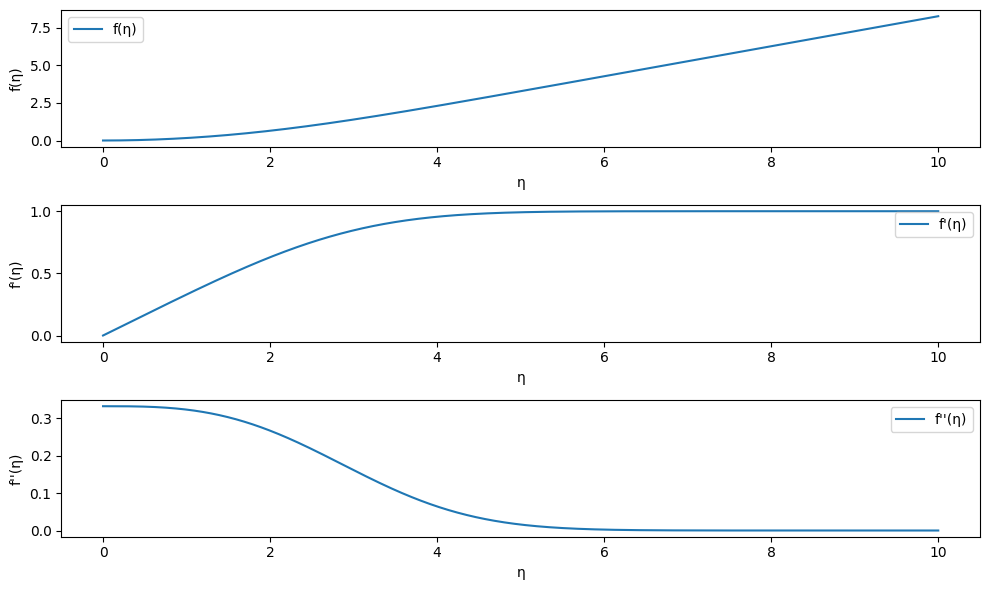

In [4]:
# Plotting the results
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(eta, f_final, label='f(η)')
plt.xlabel('η')
plt.ylabel('f(η)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(eta, fp_final, label="f'(η)")
plt.xlabel('η')
plt.ylabel("f'(η)")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(eta, fpp_final, label="f''(η)")
plt.xlabel('η')
plt.ylabel("f''(η)")
plt.legend()

plt.tight_layout()
plt.show()